# Teste de Análise De Dados - Teltec Solutions

Esse teste possui o objetivo de medir o seu conhecimento em Python e suas bibliotecas de análise e visualização de dados como o pandas e o matplotlib, por exemplo, além do seu conhecimento em ambientes de desenvolvimento on-line.

Utilizando o dataset disponibilizado ('relatorio_de_vendas.csv'), você terá de encontrar respostas aos problemas propostos. 

As respostas devem estar nas células abaixo do enunciado da questão, e podem ser em forma de Series ou DataFrames do pandas, gráficos do Matplotlib ou Seaborn ou escrito por extenso, dentro de um print, por exemplo. Tente ser o mais claro possível na sua resposta.

Bom teste e boa sorte.

## O Dataset - Relatório de Vendas de Brinquedos



### Estudo de Caso

Você é o analista de dados de uma empresa que manufatura automóveis de brinquedo. Essa empresa vende os brinquedos em atacado, para outras empresas, geralmente supermercados ou lojas especializadas.

O engenheiro de dados da empresa construiu uma pipeline que extraiu dados das vendas de produtos de Janeiro de 2020 a Maio de 2022 e as colocou em arquivo para que um relatório com as informações mais importantes seja feito e apresentado para a diretoria.

Sua função agora é selecionar, limpar, transformar e agregar os dados existentes no dataset para auxiliar a diretoria na tomada de decisões.

### Dicionário de Dados

Colunas               | Significado
--------------------- | ---------------------
**quantidade**        | Quantidade de brinquedos por pedido
**data_do_pedido**    | Data em que o pedido foi feito, <br>no formato de data em português do Brasil, *dia/mês/ano*
**status**            | Status do pedido. As duas opções possíveis são<br> *Concluída*, quando o pedido foi feito e o valor da compra foi pago, e <br> *Cancelada*, para quando a compra não foi finalizada por qualquer motivo
**tipo_do_produto**   | O tipo de brinquedo que foi comprado no pedido. As opções possíveis são<br> *Aviões*, *Barcos*, *Carros Clássicos*, *Carros Vintage*, *Motocicletas*,<br> *Ônibus e Caminhões*, e *Trens*.
**comprador**         | A empresa que fez o pedido
**pais_do_comprador** | O país de origem da empresa que fez o pedido
**valor_do_pedido**   | O valor, em moeda, do pedido feito. A moeda é irrisória, mas assumindo que <br>a empresa do estudo de caso é brasileira, trataremos como *Real (R$)*.

### Importações das bibliotecas e do dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('relatorio_de_vendas.csv')
df

,quantidade,data_do_pedido,status,tipo_do_produto,comprador,pais_do_comprador,valor_do_pedido
0,24,02/07/2020,Concluída,Carros Clássicos,Mini Gifts Distributors Ltd.,EUA,144
1,29,02/07/2020,Concluída,Carros Clássicos,Mini Gifts Distributors Ltd.,EUA,174
2,27,02/07/2020,Concluída,Carros Clássicos,Mini Gifts Distributors Ltd.,EUA,162
3,47,02/07/2020,Concluída,Carros Clássicos,Mini Gifts Distributors Ltd.,EUA,282
4,20,02/07/2020,Concluída,Carros Clássicos,Mini Gifts Distributors Ltd.,EUA,120
...,...,...,...,...,...,...,...
2818,21,03/05/2022,Concluída,Carros Clássicos,Euro Shopping Channel,Espanha,126
2819,60,03/05/2022,Concluída,Carros Clássicos,Euro Shopping Channel,Espanha,360
2820,41,03/05/2022,Concluída,Carros Clássicos,Euro Shopping Channel,Espanha,246
2821,46,31/05/2022,Cancelada,Carros Clássicos,Euro Shopping Channel,Espanha,276


## Análise Exploratória

In [3]:
"""
    Convertendo a variável df num DataFrame e convertendo a coluna data_do_pedido para o formato de data.
"""

df = pd.DataFrame(df)
df['data_do_pedido'] = pd.to_datetime(df['data_do_pedido'])

In [4]:
"""
    Verificando as dimensões do DataFrame.
"""

print(f"Dimensões do DataFrame: {df.shape}")

Dimensões do DataFrame: (2823, 7)


In [5]:
"""
    Verificando se há valores nulos.
"""

print("Número de linhas não nulas:\n")
df.info()

Número de linhas não nulas:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   quantidade         2823 non-null   int64         
 1   data_do_pedido     2823 non-null   datetime64[ns]
 2   status             2823 non-null   object        
 3   tipo_do_produto    2823 non-null   object        
 4   comprador          2823 non-null   object        
 5   pais_do_comprador  2823 non-null   object        
 6   valor_do_pedido    2823 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 154.5+ KB


In [6]:
"""
    É possível verificar que a maior data do banco é 01/12/2022 !
"""

print("Estatísticas das colunas numéricas:")
df.describe(datetime_is_numeric = True)

Estatísticas das colunas numéricas:


,quantidade,data_do_pedido,valor_do_pedido
count,2823.000000,2823,2823.000000
mean,35.092809,2021-04-25 16:48:27.545164800,291.648247
min,6.000000,2020-01-04 00:00:00,48.000000
25%,27.000000,2020-10-22 00:00:00,180.000000
50%,35.000000,2021-05-05 00:00:00,264.000000
75%,43.000000,2021-11-15 00:00:00,368.000000
max,97.000000,2022-12-01 00:00:00,1275.000000
std,9.741443,NaN,145.733439


In [7]:
"""
    Verifica-se aqui que existem 92 compradores distintos e
    19 países distintos no banco de dados. 
    Nota-se também que
        - a maioria das vendas foram concluídas (2617 de 2823)
        - aproximadamente 1/3 dos produtos pedidos foram carros clássicos (967 de 2823)
        - o país que mais fez pedidos foi o EUA (1004 de 2823)
"""

print("Estatísticas das colunas não numéricas:")
df.describe(exclude = ['int64', 'datetime64[ns]'])

Estatísticas das colunas não numéricas:


,status,tipo_do_produto,comprador,pais_do_comprador
count,2823,2823,2823,2823
unique,2,7,92,19
top,Concluída,Carros Clássicos,Euro Shopping Channel,EUA
freq,2617,967,259,1004


## 1ª Questão

Apresente o valor total arrecadado das vendas concluídas e o valor que deixou de ser arrecadado das vendas que foram canceladas.

Arrecadação em vendas concluídas: R$ 750535.00
Valor em vendas canceladas: R$ 72788.00


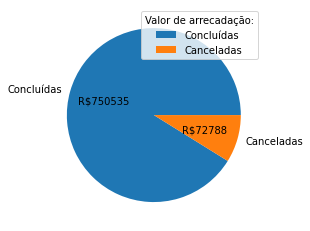

In [8]:
valorConcluidas = df['valor_do_pedido'].where(df['status'] == 'Concluída').sum()
valorCanceladas = df['valor_do_pedido'].where(df['status'] == 'Cancelada').sum()

print(f"Arrecadação em vendas concluídas: R$ {valorConcluidas:.2f}")
print(f"Valor em vendas canceladas: R$ {valorCanceladas:.2f}")

valores = [valorConcluidas, valorCanceladas]
rotulos = ['Concluídas', 'Canceladas']

plt.pie(valores, labels = rotulos, autopct = lambda x: f"R${round(x * sum(valores) / 100)}")
plt.legend(title = "Valor de arrecadação:")
plt.show();

## 2ª Questão

Demonstre a média e a mediana do valor dos pedidos. Então, exiba as vendas de maior valor, as vendas de menor valor e as vendas com o valor na mediana do dataset. Preste atenção para incluir apenas vendas que foram *Concluídas*.

In [9]:
medianaDataset = df['valor_do_pedido'].median()
print(f"Média em reais dos pedidos: R$ {df['valor_do_pedido'].mean():.2f}")
print(f"Mediana em reais dos pedidos: R$ {medianaDataset:.2f}\n")

mediana = df['valor_do_pedido'].where(df['status'] == 'Concluída').median()
print(f"Média em reais dos pedidos concluídos: R$ {df['valor_do_pedido'].where(df['status'] == 'Concluída').mean():.2f}")
print(f"Mediana em reais dos pedidos concluídos: R$ {mediana:.2f}")

print("\nVendas de maior valor: ")
maximo = df['valor_do_pedido'].where(df['status'] == 'Concluída').max()
indices = np.where((df['valor_do_pedido'] == maximo) & (df['status'] == 'Concluída'))
display(df.loc[indices])

print("\n\nVendas de menor valor: ")
minimo = df['valor_do_pedido'].where(df['status'] == 'Concluída').min()
indices = np.where((df['valor_do_pedido'] == minimo) & (df['status'] == 'Concluída'))
display(df.loc[indices])

print("\n\nVendas com valor na mediana do dataset: ")
indices = np.where((df['valor_do_pedido'] == medianaDataset) & (df['status'] == 'Concluída'))
display(df.loc[indices])

Média em reais dos pedidos: R$ 291.65
Mediana em reais dos pedidos: R$ 264.00

Média em reais dos pedidos concluídos: R$ 286.79
Mediana em reais dos pedidos concluídos: R$ 258.00

Vendas de maior valor: 


,quantidade,data_do_pedido,status,tipo_do_produto,comprador,pais_do_comprador,valor_do_pedido
1657,55,2021-11-23,Concluída,Aviões,Tokyo Collectables Ltd,Japão,825
1665,55,2021-11-24,Concluída,Aviões,Enaco Distributors,Espanha,825




Vendas de menor valor: 


,quantidade,data_do_pedido,status,tipo_do_produto,comprador,pais_do_comprador,valor_do_pedido
2106,6,2022-04-23,Concluída,Carros Vintage,Handji Gifts& Co,Singapura,48




Vendas com valor na mediana do dataset: 


,quantidade,data_do_pedido,status,tipo_do_produto,comprador,pais_do_comprador,valor_do_pedido
18,44,2020-12-11,Concluída,Carros Clássicos,Mini Gifts Distributors Ltd.,EUA,264
96,33,2020-12-11,Concluída,Carros Vintage,Mini Gifts Distributors Ltd.,EUA,264
131,33,2021-10-21,Concluída,Carros Vintage,Mini Gifts Distributors Ltd.,EUA,264
157,33,2022-02-17,Concluída,Carros Vintage,Mini Gifts Distributors Ltd.,EUA,264
177,33,2022-03-23,Concluída,Carros Vintage,Mini Gifts Distributors Ltd.,EUA,264
...,...,...,...,...,...,...,...
2757,44,2021-05-05,Concluída,Carros Clássicos,Euro Shopping Channel,Espanha,264
2781,44,2021-07-12,Concluída,Carros Clássicos,Euro Shopping Channel,Espanha,264
2782,44,2021-10-12,Concluída,Carros Clássicos,Euro Shopping Channel,Espanha,264
2801,44,2022-02-16,Concluída,Carros Clássicos,Euro Shopping Channel,Espanha,264


## 3ª Questão

Demonstre em forma de gráficos, a porcentagem da quantidade de brinquedos vendidos pelo tipo do produto e a porcentagem do valor da arrecadação por tipo do produto. Preste atenção em incluir apenas vendas que foram *Concluídas*.

{'Carros Clássicos': 34.925487199082916,
 'Carros Vintage': 21.283912877340466,
 'Motocicletas': 12.38058846006878,
 'Ônibus e Caminhões': 10.737485670615209,
 'Aviões': 10.355368742835308,
 'Barcos': 7.451280091708063,
 'Trens': 2.8658769583492547}

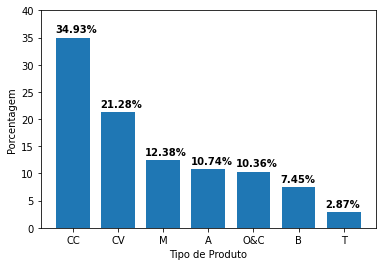

In [10]:
"""
    Porcentagem da quantidade de brinquedos vendidos pelo tipo do produto.

    O gráfico está em ordem decrescente e cada símbolo do eixo horizontal é uma sigla do tipo de produto:
        - CC: Carros Clássicos
        - CV: Carros Vintage
        - M: Motocicletas
        - A: Aviões
        - O&C: ônibus e Caminhões
        - B: Barcos
        - T: Trens
"""

quantidadePorProduto = df['tipo_do_produto'].where(df['status'] == 'Concluída').value_counts()
porcentagemDaQuantidadePorProduto = dict(100 * quantidadePorProduto / quantidadePorProduto.sum())
display(porcentagemDaQuantidadePorProduto)

figura, eixo = plt.subplots(1)
eixo.bar(['CC', 'CV', 'M', 'A', 'O&C', 'B', 'T'], porcentagemDaQuantidadePorProduto.values(), width = 0.75)
eixo.set(ylim = (0, 40))
eixo.set_xlabel("Tipo de Produto")
eixo.set_ylabel("Porcentagem")
for i, v in enumerate(porcentagemDaQuantidadePorProduto.values()):
    eixo.text(i - 0.4, v + 1, str(f"{v:.2f}%"), color = 'black', fontweight = 'bold')

,tipo_do_produto,valor_do_pedido
0,Carros Clássicos,25.545777
2,Carros Vintage,20.55174
6,Aviões,18.764615
1,Ônibus e Caminhões,13.33582
4,Barcos,10.859454
3,Motocicletas,6.051683
5,Trens,4.890911


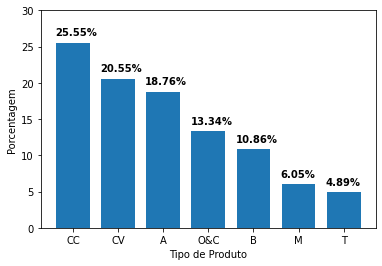

In [11]:
"""
    Porcentagem do valor da arrecadação por tipo do produto.

    O gráfico está em ordem decrescente e cada símbolo do eixo horizontal é uma sigla do tipo de produto:
        - CC: Carros Clássicos
        - CV: Carros Vintage
        - M: Motocicletas
        - A: Aviões
        - O&C: ônibus e Caminhões
        - B: Barcos
        - T: Trens
"""

indices = np.where(df['status'] == 'Concluída')
arrecadacao = df[['tipo_do_produto', 'valor_do_pedido']].loc[indices]
valores = []
for produto in arrecadacao['tipo_do_produto'].unique():
    valores.append(arrecadacao.loc[arrecadacao['tipo_do_produto'] == produto, 'valor_do_pedido'].sum())

arrecadacaoPorProduto = pd.DataFrame([arrecadacao['tipo_do_produto'].unique(), valores])
arrecadacaoPorProduto = arrecadacaoPorProduto.T
arrecadacaoPorProduto.columns = ['tipo_do_produto', 'valor_do_pedido']
porcentagemDaArrecadacaoPorProduto = arrecadacaoPorProduto
porcentagemDaArrecadacaoPorProduto['valor_do_pedido'] *= 100 / porcentagemDaArrecadacaoPorProduto['valor_do_pedido'].sum()
porcentagemDaArrecadacaoPorProduto = porcentagemDaArrecadacaoPorProduto.sort_values(by = ['valor_do_pedido'], ascending = False)
display(porcentagemDaArrecadacaoPorProduto)

figura, eixo = plt.subplots(1)
eixo.bar(['CC', 'CV', 'A', 'O&C', 'B', 'M', 'T'], porcentagemDaArrecadacaoPorProduto['valor_do_pedido'], width = 0.75)
eixo.set(ylim = (0, 30))
eixo.set_xlabel("Tipo de Produto")
eixo.set_ylabel("Porcentagem")
for i, v in enumerate(porcentagemDaArrecadacaoPorProduto['valor_do_pedido']):
    eixo.text(i - 0.4, v + 1, str(f"{v:.2f}%"), color = 'black', fontweight = 'bold')

## 4ª Questão

Apresente as 10 empresas que mais compraram produtos da nossa empresa, em questão de valores, e as 10 empresas que tem mais pedidos cancelados, em questão de valores.

In [12]:
print("Empresas que mais compraram:")
maiores_valores = df[['comprador', 'valor_do_pedido']].where(df['status'] == 'Concluída').groupby(['comprador']).sum()
display(maiores_valores[:10].sort_values(by = ['valor_do_pedido'], ascending = False))

print("\nEmpresas que tem mais pedidos cancelados em questão de valores:")
menores_valores = df[['comprador', 'valor_do_pedido']].where(df['status'] == 'Cancelada').groupby(['comprador']).sum()
display(menores_valores[:10].sort_values(by = ['valor_do_pedido'], ascending = False))

Empresas que mais compraram:


,valor_do_pedido
comprador,
Australian Collectors Co.,15811.0
AV Stores Co.,14716.0
Anna's Decorations Ltd,9960.0
Alpha Cognac,7758.0
Amica Models & Co.,6954.0
Auto Assoc. & Cie.,5250.0
Auto Canal Petit,4740.0
Australian Gift Network Co.,4638.0
Australian Collectables Ltd,4090.0



Empresas que tem mais pedidos cancelados em questão de valores:


,valor_do_pedido
comprador,
Euro Shopping Channel,19299.0
Gifts4AllAges.com,5382.0
Land of Toys Inc.,4904.0
Danish Wholesale Imports,4290.0
La Rochelle Gifts,3550.0
Mini Auto Werke,2590.0
Australian Collectables Ltd,1881.0
Petit Auto,888.0
Diecast Classics Inc.,608.0


## 5ª Questão

Demonstre a evolução da arrecadação mês a mês, de janeiro de 2020, até maio de 2022.

,valor_do_pedido
meses,
1.0,16930.0
2.0,20140.0
3.0,16698.0
4.0,21125.0
5.0,23182.0
6.0,25862.0
7.0,10434.0
8.0,18705.0
9.0,18366.0


Text(0, 0.5, 'Valor da venda')

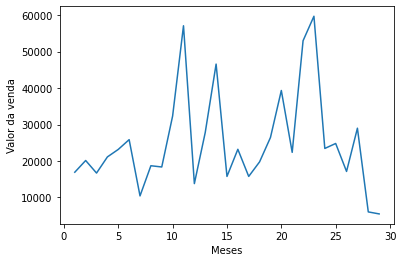

In [13]:
"""
    Inicialmente, fazemos uma cópia do DataFrame principal para podermos adicionar a coluna meses.
    Em seguida, é feito a extração dos meses e dos anos das datas dos pedidos. Com isso, os valores
    da coluna meses podem ser calculados (meses = mes + 12 * ano).

    Então, uma consulta é realizada com base no que foi pedido na questão. O DataFrame resultante (evolucao) é mostrado e
    gera-se, também, um gráfico a partir deste DataFrame (evolucao).
"""

copia_df = df.copy()

mes = df['data_do_pedido'].dt.month
ano = df['data_do_pedido'].dt.year - 2020
meses = mes + 12 * ano
copia_df['meses'] = meses
maio = 29 # mês 5 + 2 anos(24 meses) = 5 + 24 = 29

evolucao = copia_df[['meses', 'valor_do_pedido']].where((copia_df['status'] == 'Concluída') & (copia_df['meses'] <= maio)).groupby(['meses']).sum()
display(evolucao.sort_values(by = ['meses']))

plt.plot(evolucao.sort_values(by = ['meses']));
plt.xlabel("Meses")
plt.ylabel("Valor da venda")